#### Portfolio 
In diesem Jupyter Notebook möchte ich ein paar Beispiele für Datenverarbeitung liefern.
Der benutzte Datensatz sammelt Titanic-Passagiere in einer CSV-Datei und ist aus diesem GitHub.
https://github.com/tpradeep8/tableau-data-visualization/blob/master/titanic%20passenger%20list.csv

**Diese Spalten umfasst der Datensatz:**

- pclass -> Klasse  

- survived -> hat überlebt (0 = nein, 1 = ja)
- name -> Name 
- sex -> Geschlecht
- age -> Alter 
- sibsp -> Anzahl von Geschwistern und Ehepartnern an Bord
- parch -> Anzahl von Eltern und Kindern an Bord
- ticket -> Ticket Nummer
- fare -> Fahrpreis
- cabin -> Kabinennummer
- embarked -> Zustiegshafen (C = Cherbourg, Q = Queenstown, S = Southampton)
- boat -> Nummer des Rettungsbotes, wenn vorhanden
- body -> Nummer des Leichnahms, wenn vorhanden
- home.dest -> Zielort

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm 

In [2]:
#Einlesen der Daten und Ausgabe von 3 Einträgen
df = pd.read_csv('titanic.csv',sep=',',header=None)
n_pass = len(df[0]) - 1
display(df.iloc[:4])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1. Simpler Plot
Wie hängt das Alter der Passagiere mit ihrem Überleben zusammen?

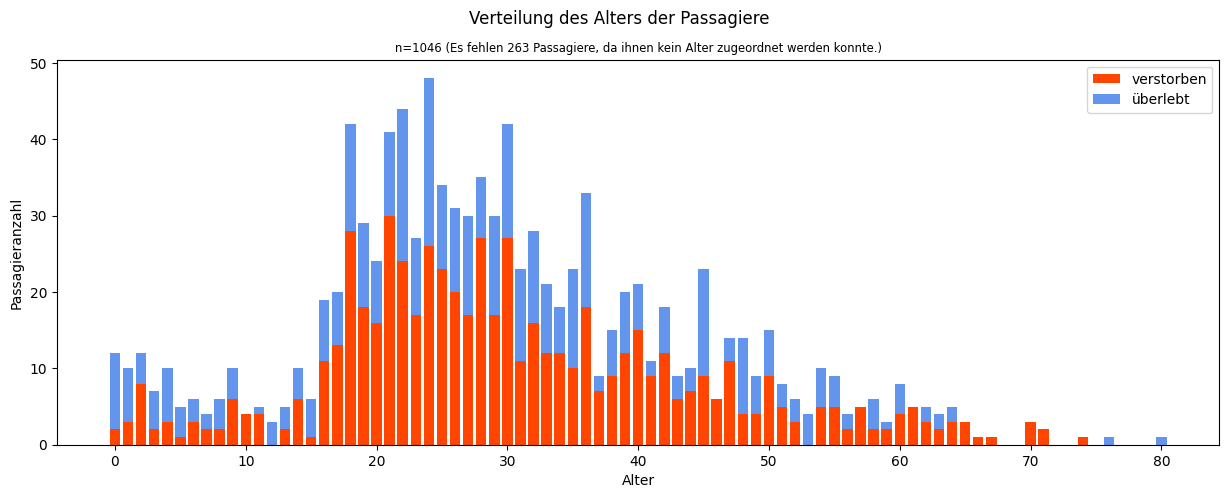

In [11]:
# Abrunden des Alters auf ganze Zahlen und Entfernen der leeren Werte
survived = df[1].to_numpy()[1:].astype(float)
age = df[4].to_numpy()[1:].astype(float)
age_no_floats = np.floor(age) 
age_val, age_c = np.unique(age_no_floats, return_counts=True)


# x-Achse für den Plot vorbereiten und y-Werte aufbereiten
# Auch wenn ich Python-Loops generell gerne vermeide erspart mir dieser viel Schreibarbeit
xaxis = np.arange(age_val[~np.isnan(age_val)].max() + 1)
y_data = np.zeros((2,xaxis.shape[0]))
plt.figure(figsize = (15,5))

for i in range(2):
    surv_sel = survived == i
    age_uni, age_count = np.unique(age_no_floats[surv_sel],return_counts=True)
    if np.isnan(age_uni).any(): 
        age_uni = age_uni[:-1]
        age_count = age_count[:-1]
    y_data[i,age_uni.astype(int)] = age_count
    if i == 0:
        plt.bar(xaxis,y_data[0], color='orangered')
    else:
        plt.bar(xaxis, y_data[1],bottom=y_data[0], color='cornflowerblue')




plt.xlabel("Alter")
plt.ylabel("Passagieranzahl")
plt.legend(['verstorben','überlebt'])
plt.suptitle('Verteilung des Alters der Passagiere')
plt.title('n=' + str(age_c[:-1].sum()) + ' (Es fehlen ' + str(age_c[-1]) + ' Passagiere, da ihnen kein Alter zugeordnet werden konnte.)', fontsize='small')
plt.show()


#### 2. Clustering Algorithmus 
Wir suchen mithilfe eines simplen Machine Learning Algorhitmuses 4 Gruppen in dem Datensatz. Jeder Passagier wird hierbei ein Datenpunkt mit den 4 Eigenschaften Klasse, Geschlecht, Geschwister/Partern sowie Eltern/Kinder.
Die Zentren der Gruppen(Cluster) geben uns dann Auskunft über die durchschnittlichen Eigenschaften der Gruppen.

In [4]:
# k-Means Funktion - ich habe die Funktionen für ein Machine Learning Modul geschrieben und verwende sie hier wieder

def distmat(X, Y):
    """ Distance Matrix
    INPUT:      X           - dxn array of N data points with d features
                Y           - dxm array of M data points with d features
    OUTPUT:     distmat     - nxm array s.t. D[i, j] = || x_i - y_j ||^2
    Hint: np.tile might be helpful
    """

    d, n = np.shape(X)
    d_y, m = np.shape(Y)
    assert d == d_y
    
    # calculate the distance matrix
    # ... your code here ...
    A_dia = np.diagonal(X.T @ X).reshape(n,1)
    A = np.tile(A_dia,m)
    B = X.T @ Y
    C_dia = np.diagonal(Y.T @ Y).reshape(1,m)
    C = np.tile(C_dia,(n,1))
    dist = A - 2 * B + C
    
    return dist
    
def get_closest(dist):
    """ Distance Matrix
    INPUT:      dist       - nxm array of distance between data point n and m
    OUTPUT:     closest    - nxk array that indicates for each of the N data points
                             in X the closest centroid in current iteration.
                             Each row in closest only holds one non-zero entry. 
                             closest[i, j] == 1 <=> 
                             centroids[:, j] is closest to data point X[:, i]
    """
    
    n, k = dist.shape
    closest = np.zeros((n, k), dtype='bool')
    
    # compute the matrix indicating the closest centroid
    # ... your code here ...
    
    idx = np.argmin(dist,axis=1)
    lin = np.arange(n)
    closest[lin,idx] = 1
    
    return closest

def update_centroids(X, closest):
    """
    INPUT:  X            - dxn array of N data points with D features
            closest      - nxk array that indicates for each of the N data points
                           in X the closest centroid after convergence.
                           Each row in closest only holds one non-zero entry. 
                           closest[i, j] == 1 <=> 
                           centroids[:, j] is closest to data point X[:, i]
    OUTPUT: centroids    - dxk array of k centroids with d features
    """
    
    # ... your code here ...
    X_sum = X @ closest
    group_size = np.sum(closest,axis=0)
    centroids = np.divide(X_sum,group_size)
    
    return centroids

In [5]:
# diverse spalten importieren und die spalte "sex" als 0=female und 1=male codieren
pclass = df[0].to_numpy()[1:].astype(float)
survived = df[1].to_numpy()[1:].astype(float)
sex = df[3].to_numpy()[1:]
sex[sex == 'female'] = 0
sex[sex == 'male'] = 1
sibsp = df[5].to_numpy()[1:].astype(float)
parch = df[6].to_numpy()[1:].astype(float)

# Spalten zu Matrix kombinieren
X_data = np.concatenate((pclass.reshape(n_pass,1), sex.reshape(n_pass,1), sibsp.reshape(n_pass,1), parch.reshape(n_pass,1)), axis=1).T
X_mean = np.mean(X_data,axis=1)

# Clustering vorbereiten 
iterations = 2000
k = 4
features = 4
np.random.seed(1)
gauss_dist = np.random.normal(0.0,1.0,(X_data.shape[0],k))
clust = np.add(np.tile(X_mean,(k,1)).T,gauss_dist)

# Iteration der Clustersuche mit kleiner Ladeanimation
for i in tqdm(range(iterations)):
    dist = distmat(X_data, clust) 
    closest = get_closest(dist) 
    clust = update_centroids(X_data,closest)
    #if (i % 50) == 0:
    #    print("#",end='')

closest = get_closest(distmat(X_data, clust))

100%|██████████| 2000/2000 [04:16<00:00,  7.80it/s]


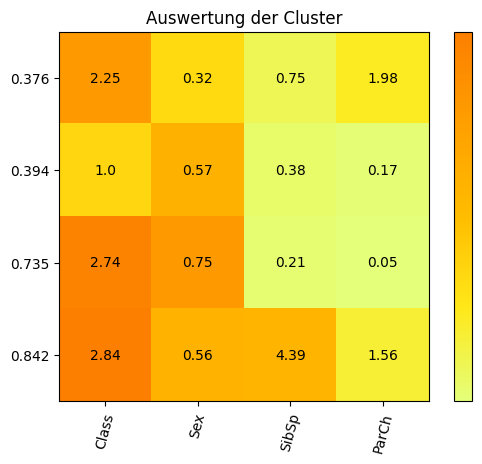

In [13]:
close_surv = np.concatenate((closest,survived.reshape(survived.shape[0],1)),axis=1)

feat_max = X_data.max(axis=1)
corr_mat = np.zeros((features,k))
death_rate = np.zeros(k)

for c in range(k):
    c_sel = close_surv[:,c] == 1
    death_rate[c] = round(1 - np.average(close_surv[c_sel,k]),3)
    corr_mat[c] = clust[c].astype(float) / feat_max[c] #/ clust[c].astype(float).sum()

corr_mat = corr_mat[:,death_rate.argsort()] 
clust_sorted = clust[:,death_rate.argsort()]
death_rate.sort()

feature_labels=['Class','Sex','SibSp','ParCh']

plt.imshow(corr_mat.T, cmap='Wistia')
plt.title("Auswertung der Cluster")
plt.xticks(range(4),feature_labels, rotation=75)
plt.yticks(range(4),death_rate)
for feat in range(features):
    for cl in range(k):
        label = round(clust_sorted[feat,cl],2)
        plt.text(feat,cl,label, color='black',ha='center',va='center')


cbar = plt.colorbar()
cbar.set_ticks([])
plt.show()


#### Interpretation:
Auf dem Graphen sieht man für jedes Cluster-Zenrum eine Zeile und für jedes Feature eine Spalte. Jedes Cluster ist mit der Sterberate seiner Passagiere gelabelt.
Diese Gruppen können wir jetzt aufgrund ihrer durchschnittlichen Merkmale beschreiben(die absoluten Zahlen in den Feldern). Das geht natürlich nur wenn man etwas generalisiert.

**Zeilen:**

1. "Frauen aus der 2.Klasse" -> verhältnismäßig, geringe Sterberate **0.37**
2. "Personen aus der 1.Klasse" -> verhältnismäßig, geringe Sterberate **0.39**
3. "Alleinstehende Männer aus der 3.Klasse" -> zweithöchste Sterberate **0.73** 
4. "Menschen aus großen Familien aus der 3.Klasse" -> höchste Sterberate **0.84**